<a href="https://colab.research.google.com/github/Rushabhbhagat08/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<u>Project name:</u>** TITANIC SURVIVAL PREDICTION

##**Problem statments**
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# **Let's Begin !**

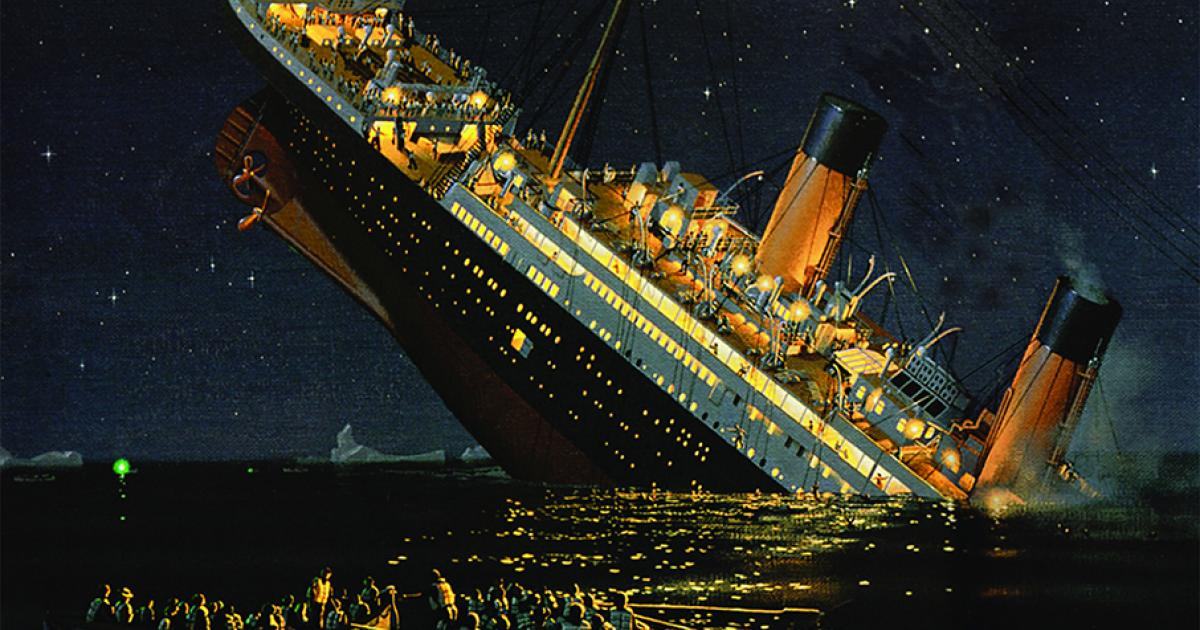

## **1. Know Your Data**

###Import liberies

In [28]:
# import required liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# ML Liberies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


### Dataset Loading

In [29]:
# import our dataset in csv format
titanic_data=pd.read_csv('/content/drive/MyDrive/Codsoft/Titanic Prediction/tested.csv')

### Dataset First View

In [30]:
# see the first five rows in the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
# see the Last five rows in the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Dataset Rows & Columns count

In [32]:
# check shape of the dataset
column=titanic_data.shape[0]
rows=titanic_data.shape[1]
print(f'There are {column} Columns and {rows} Rows in the dataset')

There are 418 Columns and 12 Rows in the dataset


In [33]:
# see the unique value in PassengerId
titanic_data.PassengerId.value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

### Dataset Information

In [34]:
# see the columns our dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
# dataset Information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##Data Cleaning

In [36]:
# Remove Unwanted columns from dataset
titanic_data.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

###Missing Values/Null Values

In [37]:
# Missing Values/Null Values
titanic_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [38]:
# fill the null value in median of the values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

In [39]:
# convert values into float or int
import re
titanic_data['Ticket'] = titanic_data['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [40]:
# check the null values in the dataset
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

Now, the dataset is clean There doest not any null or missing values in the dataset.

In [41]:
# finall dataset overview
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,34.5,0,0,330911,7.8292
1,1,3,female,47.0,1,0,363272,7.0000
2,0,2,male,62.0,0,0,240276,9.6875
3,0,3,male,27.0,0,0,315154,8.6625
4,1,3,female,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,53236,8.0500
414,1,1,female,39.0,0,0,17758,108.9000
415,0,3,male,38.5,0,0,3101262,7.2500
416,0,3,male,27.0,0,0,359309,8.0500


## ***2. Understanding Your Variables***

In [42]:
# describe dataset
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **3. Data Vizualization**

In [43]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})
titanic_data['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

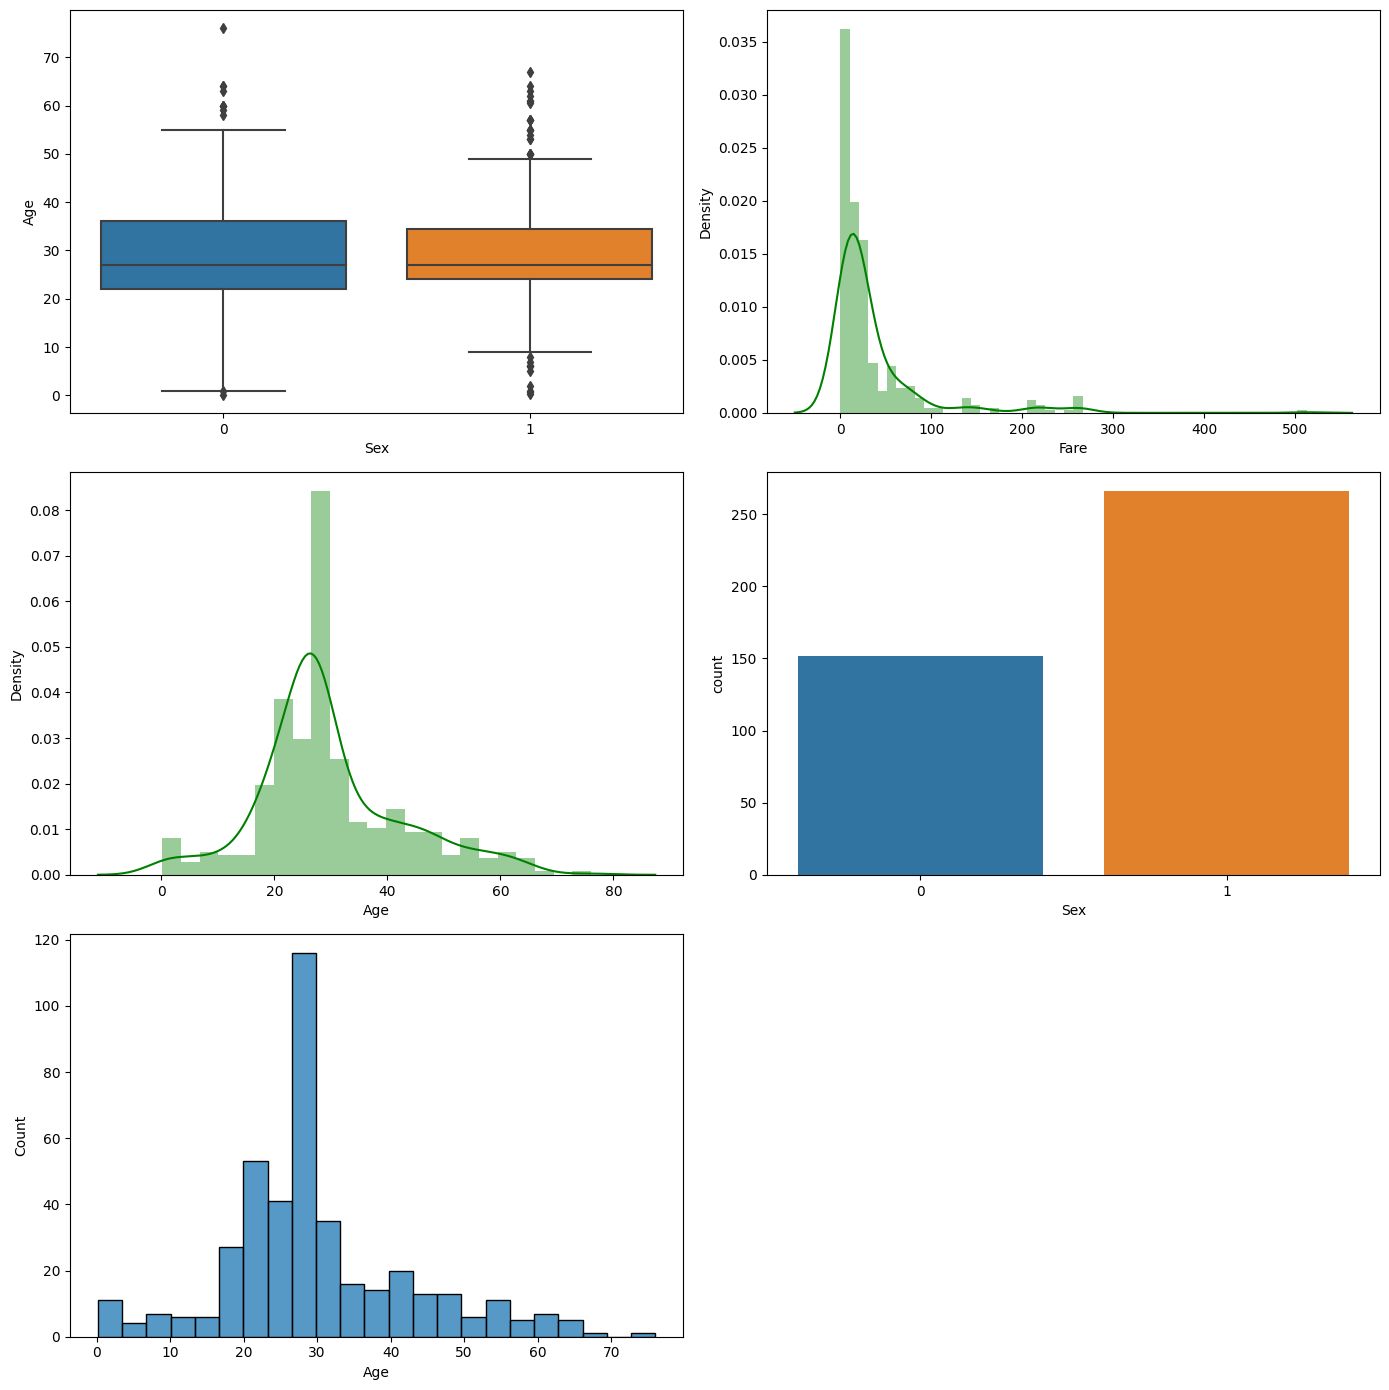

In [44]:
# Plot the Age graph
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sns.boxplot(x='Sex', y = 'Age',data= titanic_data)
# 'male': 1, 'female': 0

plt.subplot(3,2,2)
sns.distplot(titanic_data['Fare'],color='g')

plt.subplot(3,2,3)
sns.distplot(titanic_data['Age'],color='g')

plt.subplot(3,2,4)
sns.countplot(x='Sex', data=titanic_data)

plt.subplot(3,2,5)
sns.histplot(titanic_data['Age'])


plt.tight_layout()
plt.show()

As predicted, males have a much higher chance of survival than females. The Sex feature is essential in our predictions.

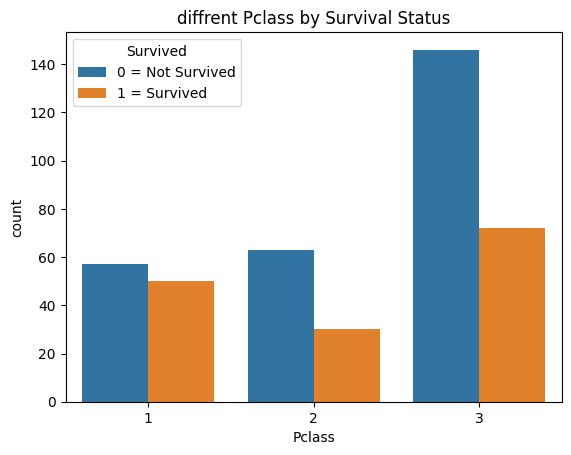

In [45]:
# plot the servivel status graph
sns.countplot(x='Pclass',data=titanic_data,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

As Visulization, Pclass 3  have a much higher chance of survival than Pclass 1 and Pclass 2.

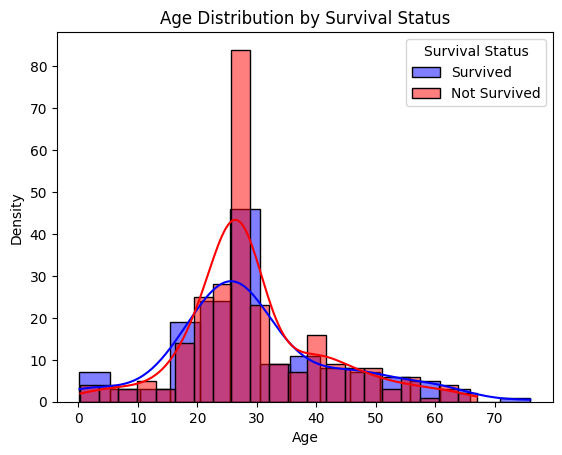

In [47]:
# plot the age distribution status
sns.histplot(data=titanic_data[titanic_data['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')
sns.histplot(data=titanic_data[titanic_data['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

plt.legend(title='Survival Status')

plt.show()

The Age Group between age 25 to 30 have a much higher chance of survival.

## ***4. ML Model Implementation***

##Split the Data Into Train and Test Datasets

In [48]:
# split the datastet
x = titanic_data.drop(['Survived'],axis=1)
y = titanic_data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [49]:
# standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# implement the ML Models
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),
          }

In [51]:
# Evaluating the model for it's accuracy
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{model_name} - Accuracy: {(accuracy)*100} %")

Logistic Regression - Accuracy: 63.095238095238095 %
Decision Tree - Accuracy: 100.0 %
Random Forest - Accuracy: 100.0 %
Gradient Boosting - Accuracy: 100.0 %


In [52]:
# ML MIn Maxx Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rand = RandomForestClassifier()
normal = MinMaxScaler()

In [53]:
#ML Normilization
normal_fit = normal.fit(X_train)
new_xtrain = normal_fit.transform(X_train)
new_xtest = normal_fit.transform(X_test)

In [54]:
fit_rand = rand.fit(new_xtrain, Y_train)
#predicting score
rand_score = rand.score(new_xtest, Y_test)
print('Score of model is : ', rand_score*100,'%')

Score of model is :  100.0 %


In [55]:
# draw the predicted values vs Original Values list
X_predict = list(rand.predict(X_test))
predicted_df = {'predicted_values': X_predict,'Actual Values': Y_test}
print(pd.DataFrame(predicted_df).head(20))
print('')
print('Here O = not survived and 1 = survived')

     predicted_values  Actual Values
345                 1              1
378                 0              0
178                 1              1
367                 1              1
191                 0              0
60                  0              0
201                 0              0
183                 0              0
364                 1              1
200                 1              1
286                 0              0
124                 0              0
117                 1              1
154                 0              0
171                 0              0
198                 0              0
22                  1              1
90                  1              1
399                 0              0
279                 0              0

Here O = not survived and 1 = survived


# **5. Conclusion**

1. males have a much higher chance of survival than females. The Sex feature is essential in our predictions.
2. The Age Group between age 25 to 30 have a much higher chance of survival.
3. Pclass 3  have a much higher chance of survival than Pclass 1 and Pclass 2.
4. Only 3 models (Decision Tree, Random Forest, Gradient Boosting) out of 4 models proviedes 100% accuracy (i.e 1.0).


###**Hurrah! You have successfully completed Graduate Admissions from an Indian perspective  Project !!!**